# Yelp Dataset Analysis - Pub Ratings

In [8]:
import csv
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

Import custom restauramt and not_restaurant csv files as dataframes

In [15]:
restaurant_df = pd.read_csv('is_restaurant.csv')
restaurant_df = restaurant_df.drop(['Unnamed: 0','city'], 1)
restaurant_df = restaurant_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)
restaurant_df['index_no'] = restaurant_df.index

not_restaurant_df = pd.read_csv('not_restaurant.csv')
not_restaurant_df = not_restaurant_df.drop(['Unnamed: 0','city','distance'], 1)
not_restaurant_df = not_restaurant_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)
not_restaurant_df['index_no'] = not_restaurant_df.index


## Rating of Restaurants Based on the Ratings of Other Restaurants Around It

In [41]:
restaurant_rating_df = pd.DataFrame()

def haversine(x):
    
    global restaurant_df
    global restaurant_rating_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(restaurant_df['latitude']), np.radians(restaurant_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    restaurant_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = restaurant_df
    measure_1 = measure_1.loc[measure_1['distance'] <= 1]
    
    # Calculate the mean rating of the surrounding pubs
    mean_rating = measure_1['stars'].mean()
    density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    restaurant_rating_df = restaurant_rating_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'mean_business_rating': mean_rating, "density": density}, ignore_index=True)
    return restaurant_rating_df


for line in restaurant_df['index_no']:
    x = restaurant_df.loc[restaurant_df['index_no'] == line]
    haversine(x)


In [42]:
restaurant_rating_df = restaurant_rating_df[restaurant_rating_df.density != 0]

In [45]:
restaurant_rating_df = restaurant_rating_df[(restaurant_rating_df.mean_business_rating >= 2.5)]
#final_pubs_df.describe()

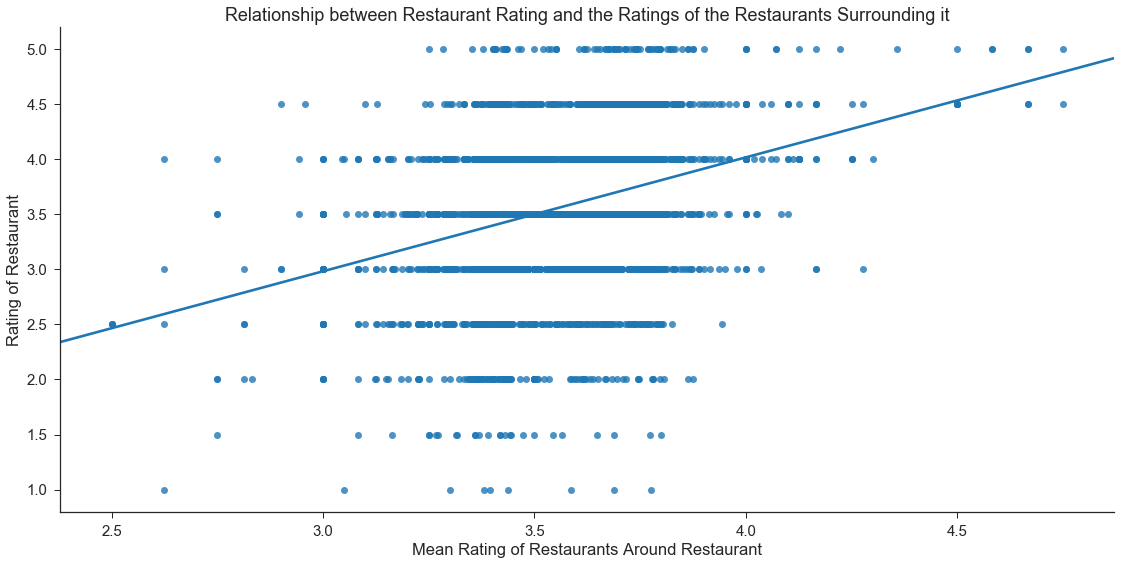

In [47]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="mean_business_rating", y="rating", size=8,ci=None, data = restaurant_rating_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Restaurant Rating and the Ratings of the Restaurants Surrounding it")
plt.xlabel('Mean Rating of Restaurants Around Restaurant')
plt.ylabel('Rating of Restaurant')

## Ratings of Restaurants Based on Ratings of Non-Restaurant Businesses

In [52]:
final_nonrestaurants_df = pd.DataFrame()

def haversine(x):
    
    global not_restaurant_df
    global final_nonrestaurants_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(not_restaurant_df['latitude']), np.radians(not_restaurant_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    not_restaurant_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = not_restaurant_df
    measure_1 = measure_1.loc[measure_1['distance'] <= 1.0]
    
    # Calculate the mean rating of the surrounding pubs
    mean_rating = measure_1['stars'].mean()
    density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    final_nonrestaurants_df = final_nonrestaurants_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'mean_business_rating': mean_rating, "density": density}, ignore_index=True)
    return final_nonrestaurants_df


for line in restaurant_df['index_no']:
    x = restaurant_df.loc[restaurant_df['index_no'] == line]
    haversine(x)


In [53]:
final_nonrestaurants_df = final_nonrestaurants_df[(final_nonrestaurants_df.density != 0)]


In [58]:
final_nonrestaurants_df = final_nonrestaurants_df[final_nonrestaurants_df.mean_business_rating >= 1.2]
#final_nonrestaurants_df = final_nonrestaurants_df[(final_nonrestaurants_df.rating >= 2.2)]


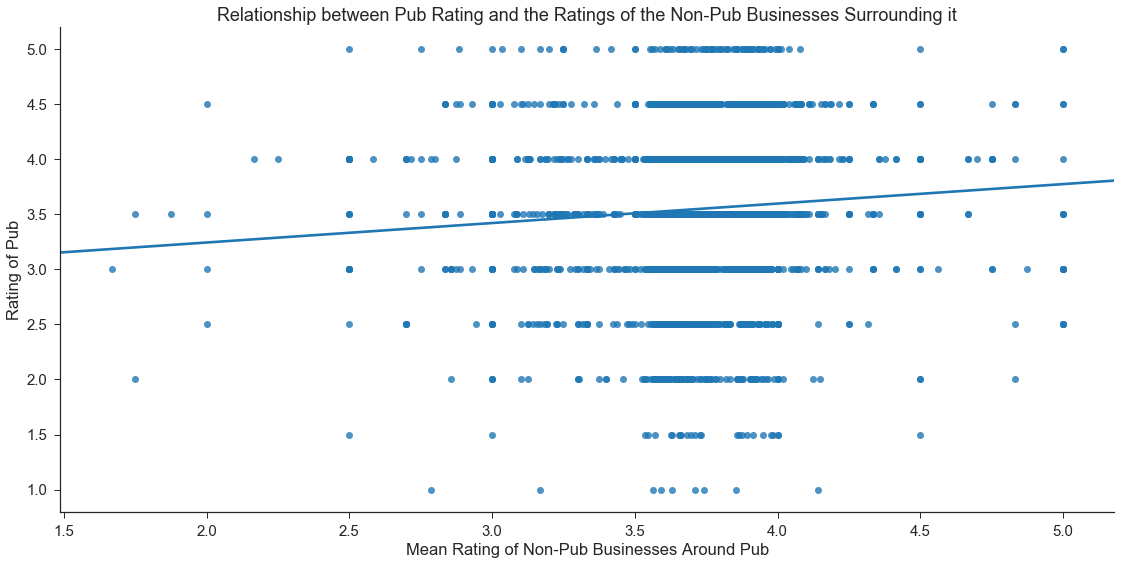

In [59]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="mean_business_rating", y="rating", size=8, ci=None, data=final_nonrestaurants_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and the Ratings of the Non-Pub Businesses Surrounding it")
plt.xlabel('Mean Rating of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

#### We see that as the density of businesses increases, the quality of pubs decreases.

1. Consistant with Sutton's Model of Endogeneous Fixed Costs, pubs quality depends on variable costs so the market     fragments as it grows larger and the quality does not increase and infact decreases as density of businesses around it increases. The relationship between
   market size and the distribution of quality depends on whether quality is produced
   primarily through fixed or variable 

    Sutton's MOdel of Endogenous Fixed Costs:
    profit of firm  = marketsize * variablecost - F(quality)



#### Quality of Pub is higher if it is surrounded by high quality pubs

# Quality and Quantity

We are interested in understanding if quality drives competition and market size. 

In [ ]:
pub_count_df = pd.DataFrame()

def haversine(x):
    
    global pubs_df
    global pub_count_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(pubs_df['latitude']), np.radians(pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = pubs_df
    measure_1 = measure_1.loc[pubs_df['distance'] <=2]
    
    # Calculate the number of pubs
    pub_count = len(measure_1.index)
    #density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    pub_count_df = pub_count_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'pub count':pub_count}, ignore_index=True)
    return pub_count_df


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    haversine(x)


In [ ]:
#pub_count_df = pub_count_df[(pub_count_df.rating >= 2.7)]


In [ ]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="pub count", y="rating", size=8, ci=None, data=pub_count_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and the Number of Pubs Around it")
plt.xlabel('Number of Pubs Around Pub')
plt.ylabel('Rating of Pub')

In [ ]:
business_count_df = pd.DataFrame()

def haversine(x):
    
    global not_pubs_df
    global business_count_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(not_pubs_df['latitude']), np.radians(not_pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    not_pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = not_pubs_df[not_pubs_df.distance <=1]
    
    # Calculate the number of pubs
    pub_count = len(measure_1.index)

    business_count_df = business_count_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'pub_count':pub_count}, ignore_index=True)
    return business_count_df


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    haversine(x)

In [ ]:
business_count_df = business_count_df[(business_count_df.rating >= 2) & (business_count_df.pub_count <= 175)]
#business_count_df = business_count_df[(business_count_df.rating >= 2.4)]


In [ ]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="pub_count", y="rating", size=8, ci=None, data=business_count_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and the Number of Pubs Around it")
plt.xlabel('Number of Pubs Around Pub')
plt.ylabel('Rating of Pub')